In [1]:
from dlem import load_reader, load_model
import matplotlib.pyplot as plt
import numpy as np
from dlem.feature_extraction import extractor
from dlem.util import diagonal_normalize
import pandas as pd
import pyBigWig
from tqdm import tqdm

In [49]:
res = 1000
window_size = 2000000//res
stride = 150

In [53]:
data = load_reader("datareader_cooler")(
    "../../../loopExtraction/data/4DNFI9GMP2J8.mcool",
    res,
    window_size,
    stride,
    chrom_subset=["chr10"],
)

In [54]:
len(data)

879

In [52]:
for i, (patch, perc_nan, _, _, _) in enumerate(tqdm(data)):
    if i == len(data):
        break
    pass

  1%|          | 6/879 [00:04<11:08,  1.31it/s]


KeyboardInterrupt: 

In [55]:
sample_i = 20
sample = data[sample_i]
log_normed = diagonal_normalize(np.log(sample[0])[np.newaxis])

In [56]:
len(data) * window_size

1758000

In [57]:
sample[1:]

(0.005, 'chr10', 3000000, 5000000)

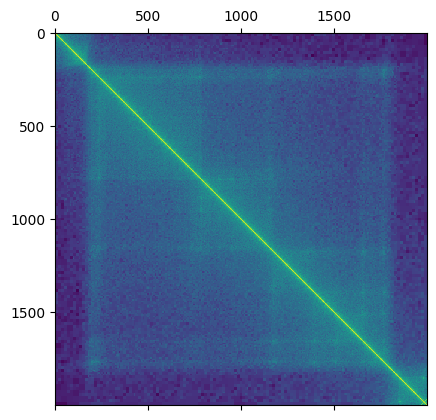

In [58]:
plt.matshow(np.log(sample[0]))

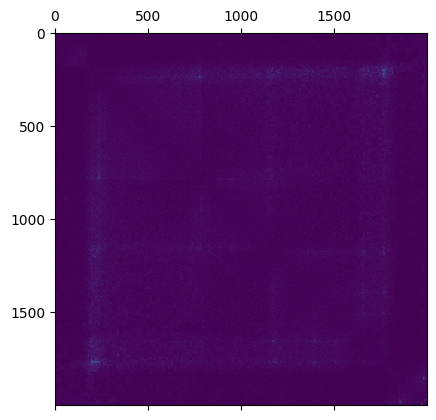

In [60]:
plt.matshow(np.exp(log_normed[0]))

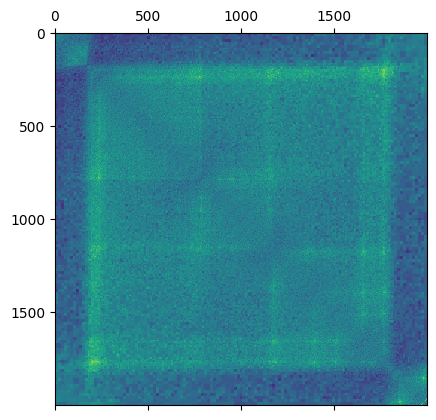

In [61]:
plt.matshow(log_normed[0])

In [11]:
import torch

In [12]:
torch.ones(10) * 0.95

tensor([0.9500, 0.9500, 0.9500, 0.9500, 0.9500, 0.9500, 0.9500, 0.9500, 0.9500,
        0.9500])

In [18]:
out = extractor(log_normed[0], diag_stop=200, diag_start=1, do_print=True, num_epoch=250)
patch_range = np.arange(
    sample[-2],
    sample[-1] + 1,
    (sample[-1] - sample[-2]) / sample[0].shape[0],
    dtype=int,
)
out_pd = pd.DataFrame(
    {
        "chr": sample[-3],
        "start": patch_range[:-1],
        "end": patch_range[1:],
        "left": out[0][0],
        "right": out[0][1],
    }
)

In [16]:
out[-1]

0.5493766482929806

In [19]:
out[0][1]

array([0.89111143, 1.        , 0.9862254 , 1.        , 0.94125164,
       1.        , 0.9052966 , 1.        , 0.8465783 , 1.        ,
       0.98510486, 1.        , 0.7455067 , 0.9754952 , 0.9303078 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.91502076, 1.        , 0.94466597, 1.        ,
       0.9655055 , 1.        , 0.8987972 , 1.        , 0.97241175,
       1.        , 0.8790106 , 1.        , 0.95414627, 1.        ,
       0.853528  , 1.        , 0.97599316, 1.        , 0.8950016 ,
       1.        , 1.        , 1.        , 0.7852125 , 1.        ,
       1.        , 1.        , 0.8963372 , 1.        , 0.8804737 ,
       1.        , 0.79224825, 1.        , 0.99640185, 1.        ,
       0.76899374, 1.        , 0.75601447, 1.        , 0.8205596 ,
       1.        , 0.8999967 , 1.        , 0.972864  , 1.        ,
       0.90132236, 1.        , 1.        , 0.8658913 , 1.     

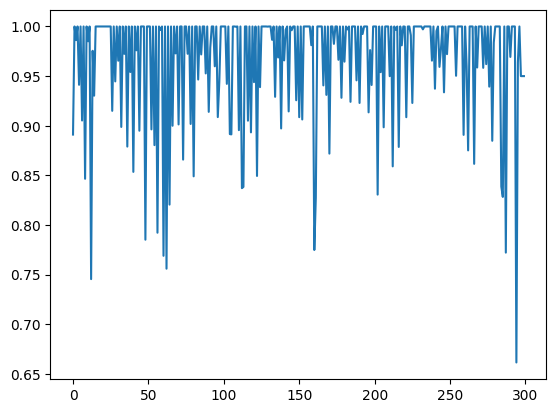

In [13]:
plt.plot(out[0][1])

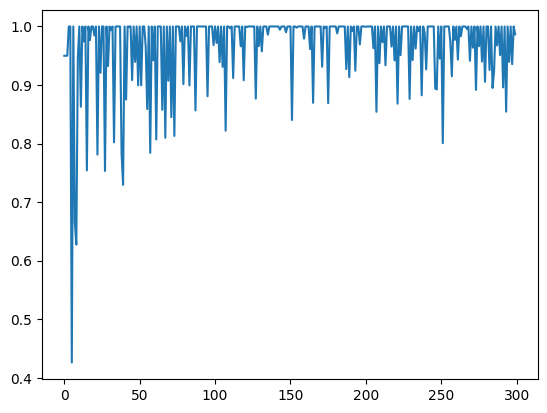

In [14]:
plt.plot(out[0][0])

Custome loss for the patch fitting. The custome loss will be used as in the shown here:
```loss_total += loss(pred, torch.log(get_diags(data, diag_i+1)))```

In [30]:
def weighted_mse(output, target):
    loss = torch.mean((output - target)**2 * torch.exp(target))
    return loss

In [64]:
diag_stop = 2000 * 750 // res
diag_start = 2000 * 5 // res

In [65]:
diag_stop, diag_start

(1500, 10)

In [66]:
out_vanilla_mse = extractor(log_normed[0],
                            diag_stop=diag_stop,
                            diag_start=diag_start,
                            do_print=True,
                            num_epoch=100,
                            return_best_corr_pred=True)

In [ ]:
out = extractor(log_normed[0],
                diag_stop=diag_stop,
                diag_start=diag_start,
                do_print=True,
                num_epoch=250,
                loss=weighted_mse,
                return_best_corr_pred=True)


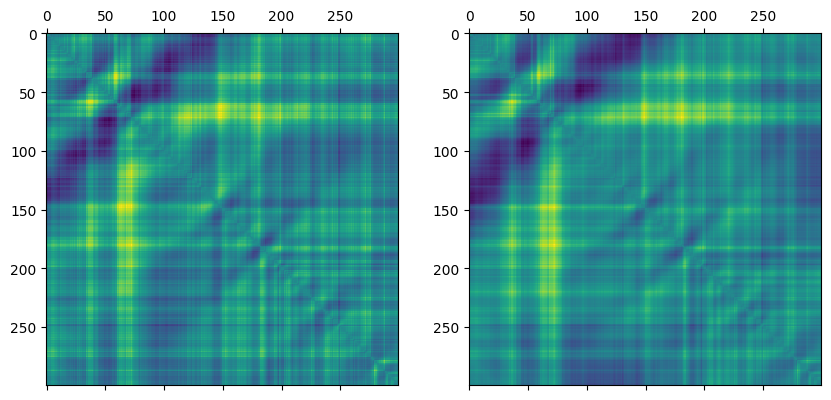

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].matshow(out_vanilla_mse[-1])
axes[1].matshow(out[-1])